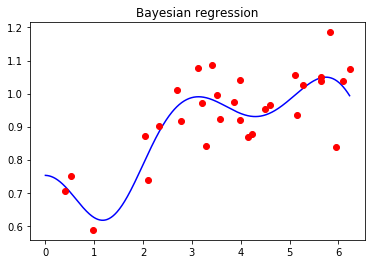

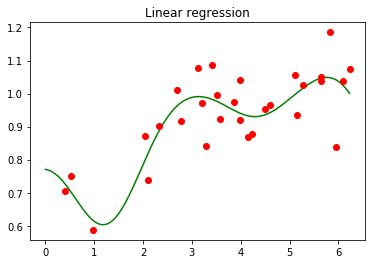

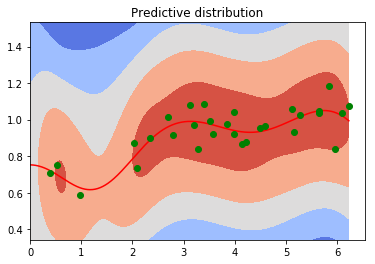

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------
# Gaussian basis function
# --------------------------------------------------------------------------------
def gaussian(mean, sigma):
    """
    Args:
        mean:  
        sigma: 
    """
    def _gaussian(x):
        return np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return _gaussian

# --------------------------------------------------------------------------------
# Design matrix
# --------------------------------------------------------------------------------
def phi(f, x): 
    bias = np.array([1])  # bias parameter(i = 0)
    # bias+basis
    return np.append(bias, f(x))

# --------------------------------------------------------------------------------
# Data generation utility
# --------------------------------------------------------------------------------
from numpy.random import rand
def uniform_variable_generator(samples):
    _random = rand(samples)
    return _random

def noise_generator(samples, mu=0.0, beta=0.1):
    noise = np.random.normal(mu, beta, samples)
    return noise

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def generator_t_function(x):
    #return np.sin(x)
    return sigmoid(x)

def generator_X_function(x):
    return 2 * np.pi * x
    #return 2 * np.pi * x

# --------------------------------------------------------------------------------
# Observations
# --------------------------------------------------------------------------------
#X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
#t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])
samples = 30

#X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
#t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])
X = generator_X_function(uniform_variable_generator(samples))
t = generator_t_function(X) + noise_generator(samples, beta=0.1)

MAX_X = max(X)
NUM_X = len(X)
MAX_T = max(t)
NUM_T = len(t)

# --------------------------------------------------------------------------------
# Gaussian basis function parameters
# --------------------------------------------------------------------------------
sigma = 0.1 * MAX_X

# mean of gaussian basis function (11 dimension w1, w2, ... w11)
mean = np.arange(0, MAX_X + sigma, sigma)  

# Basis function
f = gaussian(mean, sigma)

# --------------------------------------------------------------------------------
# Design matrix
# --------------------------------------------------------------------------------
PHI = np.array([phi(f, x) for x in X])

#alpha = 0.1 
#beta = 9.0 
alpha = 0.5  # larger alpha gives smaller w preventing overfitting (0 -> same with linear regression)
beta = 5   # Small beta allows more variance (deviation)

Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))

mean_N = beta * np.dot(Sigma_N, np.dot(PHI.T, t))

# --------------------------------------------------------------------------------
# Bayesian regression
# --------------------------------------------------------------------------------
xlist = np.arange(0, MAX_X, 0.01) 
plt.title("Bayesian regression")
plt.plot(xlist, [np.dot(mean_N, phi(f, x)) for x in xlist], 'b') 
plt.plot(X, t, 'o', color='r') 
plt.show()

# --------------------------------------------------------------------------------
# Linear regression
# --------------------------------------------------------------------------------
# w for linear regression parameter
#w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t))
# --------------------------------------------------------------------------------
l = 0.05
regularization = np.identity(PHI.shape[1])
w = np.linalg.solve(
    np.dot(PHI.T, PHI) + (l * regularization), 
    np.dot(PHI.T, t)
)

xlist = np.arange(0, MAX_X, 0.01) 
plt.title("Linear regression")
plt.plot(xlist, [np.dot(w, phi(f, x)) for x in xlist], 'g') 
plt.plot(X, t, 'o', color='r') 
plt.show()

# --------------------------------------------------------------------------------
# Predictive Distribution
# --------------------------------------------------------------------------------
def normal_dist_pdf(x, mean, var): 
    return np.exp(-(x-mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var)

def quad_form(A, x):
    return np.dot(x, np.dot(A, x))

xlist = np.arange(0, MAX_X, 0.01)
#tlist = np.arange(-1.5 * MAX_T, 1.5 * MAX_T, 0.01)
tlist = np.arange(
    np.mean(t) - (np.max(t)-np.min(t)), 
    np.mean(t) + (np.max(t)-np.min(t)), 
    0.01
)
z = np.array([
    normal_dist_pdf(tlist, np.dot(mean_N, phi(f, x)),
    1 / beta + quad_form(Sigma_N, phi(f, x))) for x in xlist
]).T

plt.contourf(xlist, tlist, z, 5, cmap=plt.cm.coolwarm)
plt.title("Predictive distribution")
plt.plot(xlist, [np.dot(mean_N, phi(f, x)) for x in xlist], 'r')
plt.plot(X, t, 'go')
plt.show()